In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.optimize import curve_fit

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:907: UserWarning: Duplicate key in file "/etc/matplotlibrc", line #469
  (fname, cnt))


In [2]:
data83 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00083 - Wavemeter Line Scan.csv',delimiter=',')
data85 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00085 - Wavemeter Line Scan.csv',delimiter=',')
data87 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00087 - Wavemeter Line Scan.csv',delimiter=',')
data88 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00088 - Wavemeter Line Scan.csv',delimiter=',')
data89 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00089 - Wavemeter Line Scan.csv',delimiter=',')
data90 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00090 - Wavemeter Line Scan.csv',delimiter=',')
data91 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00091 - Wavemeter Line Scan.csv',delimiter=',')
data92 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00092 - Wavemeter Line Scan.csv',delimiter=',')
data93 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00093 - Wavemeter Line Scan.csv',delimiter=',')
data94 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00094 - Wavemeter Line Scan.csv',delimiter=',')
data95 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00095 - Wavemeter Line Scan.csv',delimiter=',')
data96 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00096 - Wavemeter Line Scan.csv',delimiter=',')
data98 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Wavemeter Line Scan.dir/00098 - Wavemeter Line Scan.csv',delimiter=',')

In [3]:
datas = np.array([data98,data96,data95,data94,data93,data92,data91,data85,data90,data89,data88,data87])

22.92


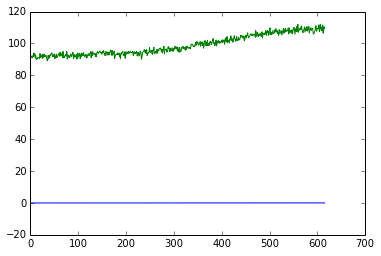

In [4]:
powers = np.array([1.2,2.5,4.,5.,7.5,10.,17.,20.,24.,33.,40.,43.])
linefits = np.array([5.6,11.1,17.4,18.,21.,35.3,37.3,39.7,39.8,41.2,68.,57.,])
plt.plot(data92[1:])
print np.max(data92[:,1]) - np.min(data92[:,1])

[  1.00000000e+07   1.16852618e-14]
saturation power = 1.48781374316e-06
1000


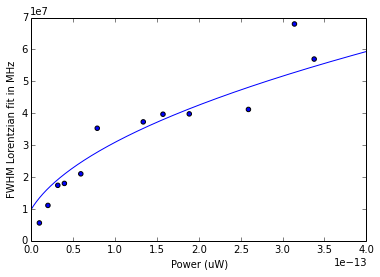

In [7]:
def sqrootfunc(x,a, I0):
   return 10e6*np.sqrt(1 + x/I0)

Int = powers*1e-6 * (np.pi*(50e-6)**2)
gamma = linefits*1e6

sqrfit, pcov1 = curve_fit(sqrootfunc, Int[0:-3],gamma[0:-3], p0=[10e6,1e-14])

print sqrfit
print 'saturation power =',sqrfit[1]/(np.pi*(50e-6)**2)
x = np.linspace(0,4e-13,1000)
print len(x)
plt.xlim([0,4e-13])
plt.ylim([0,7e7])
plt.scatter(Int,gamma)
plt.plot(x, 10e6*np.sqrt(1 + x/sqrfit[1]))
plt.xlabel('Power (uW)')
plt.ylabel('FWHM Lorentzian fit in MHz')
#plt.savefig('/home/qsimexpcontrol/plots/linewidthVSintensity')

/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


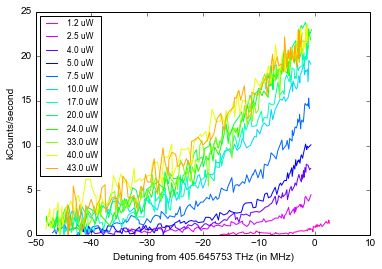

In [9]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
cm = plt.get_cmap('gist_rainbow_r')
for i, data in enumerate(datas):
    newx, newy = coursen(1000.0*data[:,0] - 8,data[:,1], 5)
    plt.plot(newx[1:],newy[1:] - np.min(newy[1:]), color = cm(1.*i/13), label=str(powers[i]) + ' uW')
plt.xlabel('Detuning farom 405.645753 THz (in MHz)')
plt.ylabel('kCounts/second')
plt.legend(prop=fontP,loc=2)
#plt.savefig('/home/qsimexpcontrol/plots/linescans.pdf')

In [8]:
def coursen(xdata,ydata,points):
    newlength = int(len(xdata)/points)
    newxdata = []
    newydata = []
    j = 0
    for i in range(newlength):
        i = points*(i)
        newydata.append(np.mean(ydata[int(j):int(i)]))
        newxdata.append(xdata[int((i + j)/2)])
        j = i
    return newxdata, newydata

In [ ]:
plt.plot(data[])